# <font color='red'> Projeto 1 - Ciência dos Dados

#### Aluno: Roger Ribeiro Fava Pina

### <font color='red'> Pergunta: 
##### Países com alto IDH tendem a ter maior preocupação quanto a saúde da população com HIV ? 

## Banco de Dados

idh = Índice de Desenvolvimento Humano (escala de 0 a 100)

hiv = Mortes Anuais por HIV (a cada 10000 pessoas de pessoas)

médicos = Médicos por 1000 pessoas

Cat_IDH = Categoria na qual o IDH de um determinado país se encaixa
 

In [184]:
%matplotlib inline
import pandas as pd
import numpy as np
import math as math
from scipy import stats
import matplotlib.pyplot as plt

In [185]:
data = pd.read_excel('Base_2009.xlsx')
data = data.set_index('geo')

In [186]:
data['idh_log'] = np.log(data.idh)
data['hiv_log'] = np.log(data.hiv)

## <font color='red'> Análise da relação do IDH á Mortes Anuais por HIV a cada 10 mil pessoas de uma determinada população

#### Histograma da Coluna HIV

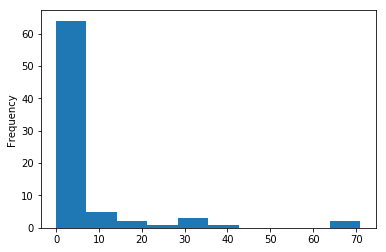

In [187]:
data.hiv.plot.hist();

Com o gráfico acima é possível perceber a frequência de intervalos dos dados da coluna hiv, a partir disso podemos concluir que  há dados outliers, ou seja, dados com valores aberrantes que apresentam um grande afastamento dos demais dados da série, esse tipo de dado ficará mais visível no gráfico Boxplot.

#### Boxplot da Coluna HIV

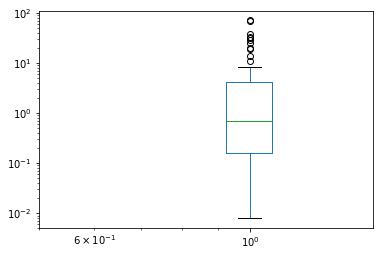

In [188]:
data.hiv.plot.box().loglog();

O gráfico Boxplot além de mostrar o possível valor máximo, mínimo, a mediada e se os valores tendem para o valor máximo ou mínimo ele tornou os dados outliers mais visíveis

#### Gráfico Scatter da Coluna IDH e HIV  + Coeficiente Linear e Angular da Reta de Ajuste + Reta de Ajuste sobreposto ao Gráfico de análise de duas variáveis

Ajuste linear entre X3 e X4:
Coeficiente linear: 19.726946953619464
Coeficiente angular: -4.748679497895827


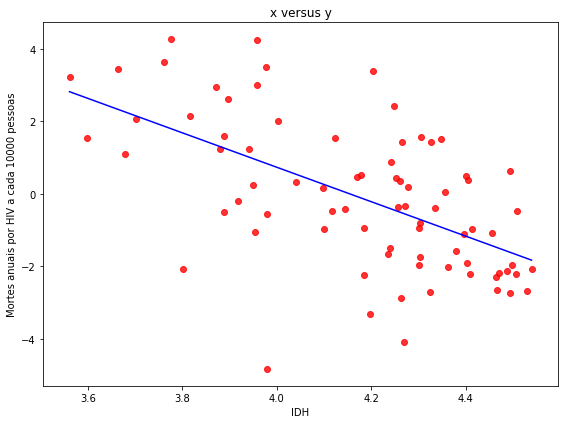

In [189]:
def reta(dados_x, dados_y, label_x, label_y):    
    a = dados_y.cov(dados_x) / dados_x.var()
    b = dados_y.mean() - a*dados_x.mean()
 
    print('Ajuste linear entre X3 e X4:')
    print('Coeficiente linear:', b)
    print('Coeficiente angular:', a)
 
    fig = plt.figure(figsize=(8, 6))
    plt.scatter(dados_x, dados_y, c='red', alpha=0.8)
    plt.title('x versus y')
    plt.xlabel(label_x)
    plt.ylabel(label_y)
    plt.legend
 
    plt.plot((dados_x.min(), dados_x.max()), (a*dados_x.min()+b, a*dados_x.max()+b), color='blue')
 
    plt.tight_layout()
    plt.show()
    
reta(data.idh_log, data.hiv_log, 'IDH', 'Mortes anuais por HIV a cada 10000 pessoas')

O Gráfico acima com a Reta de ajuste mostra que há certa relação entre as colunas idh_log e hiv_log. 

Países com Alto IDH tendem a ter menores números de mortes anuais por HIV a cada 10 mil pessoas.

#### Correlação entre as colunas idh_log e hiv_log

In [190]:
data.loc[:, ["idh_log", "hiv_log"]].corr()

,idh_log,hiv_log
idh_log,1.000000,-0.583753
hiv_log,-0.583753,1.000000


Para determinar a força da associação entre as duas colunas foi calculado o valor do coeficiente de correlação de Pearson e obtivemos e obteve-se o valor r=−0.58, o que é um valor considerável para o projeto.

### Conclusão da Análise da relação do IDH á Mortes Anuais por HIV a cada 10 mil pessoas de uma determinada população

Com base nos gráficos criados e na análise feita é possível afimar que há relação entre o IDH e o número de mortes anuais por HIV a cada 10000 pessoas, tendo como principal argumento a análise do Gráfico de dispersão (scatter) que parece existir uma associação negativa entre o idh e o hiv, que foi confirmada devido o coeficiente linear de 19.72 e coeficiente angular de -4.74 da reta de ajuste. Por fim o valor do coeficiente de correlação de Pearson calculado resultou em r=-0,58, determinando assim a força mediana de associação entre as duas variáveis.

## <font color='Red'> Análise da relação do IDH á quantidade de Médicos a cada 1000 pessoas de uma determinada população

#### Histograma da Coluna medicos

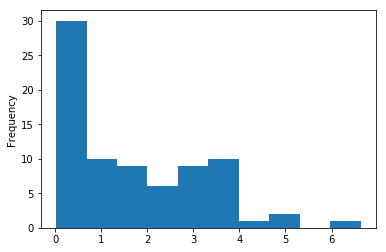

In [191]:
data.medicos.plot.hist();

Com o gráfico acima é possível perceber a frequência de intervalos dos dados da coluna medicos.

#### Boxplot da Coluna medicos

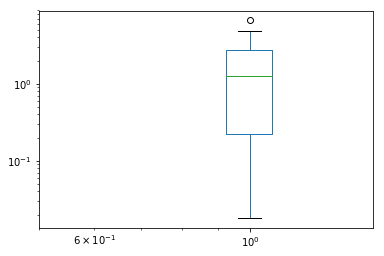

In [192]:
data.medicos.plot.box().loglog();

O gráfico Boxplot mostra o possível valor máximo, mínimo, a mediada e se os valores tendem para o valor máximo ou mínimo mas o que será importante para o futuro será esse valor outlier que ele deixa bem visível.

#### Gráfico Scatter da Coluna IDH e Médicos  + Coeficiente Linear e Angular da Reta de Ajuste + Reta de Ajuste sobreposto ao Gráfico de análise de duas variáveis

Ajuste linear entre X3 e X4:
Coeficiente linear: -22.43065893457216
Coeficiente angular: 5.313917645977442


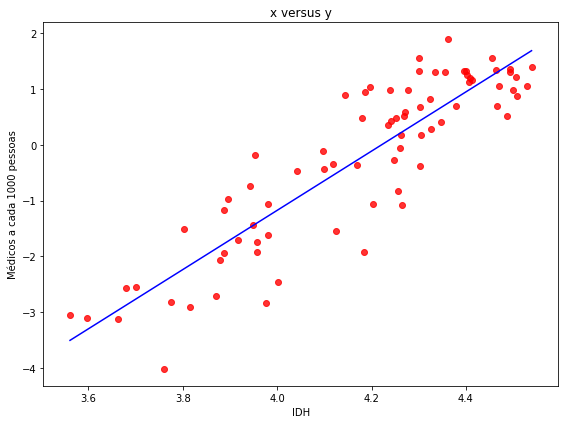

In [193]:
def reta(dados_x, dados_y, label_x, label_y):    
    a = dados_y.cov(dados_x) / dados_x.var()
    b = dados_y.mean() - a*dados_x.mean()
 
    print('Ajuste linear entre X3 e X4:')
    print('Coeficiente linear:', b)
    print('Coeficiente angular:', a)
 
    fig = plt.figure(figsize=(8, 6))
    plt.scatter(dados_x, dados_y, c='red', alpha=0.8)
    plt.title('x versus y')
    plt.xlabel(label_x)
    plt.ylabel(label_y)
    plt.legend
 
    plt.plot((dados_x.min(), dados_x.max()), (a*dados_x.min()+b, a*dados_x.max()+b), color='blue')
 
    plt.tight_layout()
    plt.show()
    
reta(data.idh_log, data.medicos_log, 'IDH', 'Médicos a cada 1000 pessoas')

O Gráfico acima com a Reta de ajuste mostra que há certa e muita forte relação entre as colunas idh_log e medicos_log. 

Países com Alto IDH tendem a ter maior número de médicos a cada 1000 pessoas.

#### Correlação entre as colunas idh_log e medicos_log

In [194]:
data.loc[:, ["idh_log", "medicos_log"]].corr()

,idh_log,medicos_log
idh_log,1.000000,0.890425
medicos_log,0.890425,1.000000


Para determinar a força da associação entre as duas colunas foi calculado o valor do coeficiente de correlação de Pearson e obtivemos e obteve-se o valor r=+0.89, o que é um valor ótimo para afirmar tal associação.

### Conclusão da Análise da relação do IDH á quantidade de Médicos a cada 1000 pessoas de uma determinada população

Com base nos gráficos criados e na análise feita é possível afimar que há relação entre o IDH e o número de medicos a cada 1000 pessoas, tendo como principal argumento a análise do Gráfico de dispersão (scatter) que parece existir uma forte associação positiva entre o idh e os medicos, que foi confirmada devido o coeficiente linear de -22.43 e coeficiente angular de 5.31 da reta de ajuste. Por fim o valor do coeficiente de correlação de Pearson calculado resultou em r=+0,89, determinando assim a alta força de associação entre as duas variáveis.

## <font color='Red'> Análise da relação entre o número de mortes anuais por HIV a cada 10000 pessoas e a quantidade de Médicos a cada 1000 pessoas de uma determinada população.

#### Gráfico Scatter da Coluna IDH e HIV  + Coeficiente Linear e Angular da Reta de Ajuste + Reta de Ajuste sobreposto ao Gráfico de análise de duas variáveis

Ajuste linear entre X3 e X4:
Coeficiente linear: -0.3001085078208018
Coeficiente angular: -0.4954329500947827


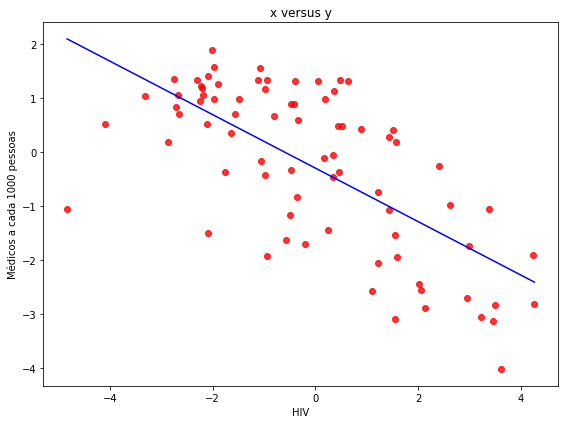

In [195]:
def reta(dados_x, dados_y, label_x, label_y):    
    a = dados_y.cov(dados_x) / dados_x.var()
    b = dados_y.mean() - a*dados_x.mean()
 
    print('Ajuste linear entre X3 e X4:')
    print('Coeficiente linear:', b)
    print('Coeficiente angular:', a)
 
    fig = plt.figure(figsize=(8, 6))
    plt.scatter(dados_x, dados_y, c='red', alpha=0.8)
    plt.title('x versus y')
    plt.xlabel(label_x)
    plt.ylabel(label_y)
    plt.legend
 
    plt.plot((dados_x.min(), dados_x.max()), (a*dados_x.min()+b, a*dados_x.max()+b), color='blue')
 
    plt.tight_layout()
    plt.show()
    
reta(data.hiv_log, data.medicos_log, 'HIV', 'Médicos a cada 1000 pessoas')

O Gráfico acima com a Reta de ajuste mostra que há certa e muita forte relação entre as colunas hiv_log e medicos_log. 

Países com Alto número de médicos a cada 10000 pessoas tendem a ter menor número de mortes anuais por HIV a cada 10000 pessoas.

#### Correlação entre as colunas idh_log e medicos_log

In [196]:
data.loc[:, ["hiv_log", "medicos_log"]].corr()

,hiv_log,medicos_log
hiv_log,1.000000,-0.675323
medicos_log,-0.675323,1.000000


Para determinar a força da associação entre as duas colunas foi calculado o valor do coeficiente de correlação de Pearson e obtivemos e obteve-se o valor r=-0,67, o que é um valor bom para afirmar tal associação.

### Conclusão da Análise da relação entre o número de mortes anuais por HIV a cada 10000 pessoas e a quantidade de Médicos a cada 1000 pessoas de uma determinada população.

Com base nos gráficos criados e na análise feita é possível afimar que há relação entre o número de morter anuais por HIV a cada 10000 pessoas e a quantidade de medicos a cada 1000 pessoas, tendo como principal argumento a análise do Gráfico de dispersão (scatter) que parece existir uma forte associação negativa entre o hiv e os medicos, que foi confirmada devido o coeficiente linear de -0,30 e coeficiente angular de -0,49 da reta de ajuste. Por fim o valor do coeficiente de correlação de Pearson calculado resultou em r=-0,67, determinando assim a alta força de associação entre as duas variáveis.

## <font color='red'> Conclusão.

A pergunta era
##### Países com alto IDH tendem a ter maior preocupação quanto a saúde da população com HIV ? 

Com base nas 3 análises realizadas é possível afirmar que 

##### <font color='green'> Países com alto IDH tentem a ter maior preocupação quanto a saúde da população com HIV
    
Isso porque países com alto IDH possuem uma maior quantidade de médicos a cada 1000 pessoas e menores números de mortes por HIV a cada 10000 pessoas, e como foi mostrado quanto o maior número de médicos menor as mortes por HIV.